In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('flo_dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,other_1_amount_mmol,...,x5_zinc undecylenate,x6_None,x6_copper bromide,x6_trioctylphosphine,x6_water,x6_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 63
0,0,0,0,0,0.713177,0.328895,-0.453863,-0.453709,-0.297521,-0.749374,...,0,1,0,0,0,0,6.7,622.0,680.0,58.0
1,1,1,1,1,-0.336633,-0.477469,-0.453863,-0.453709,-0.076698,-0.749374,...,0,1,0,0,0,0,1.5,445.0,568.0,123.0
2,2,2,2,2,0.713177,0.328895,-0.453863,-0.453709,-0.076698,-0.749374,...,0,1,0,0,0,0,2.5,543.0,589.0,46.0
3,3,3,3,3,-0.599085,-0.679060,-0.197558,-0.219170,-0.266618,-0.749374,...,0,1,0,0,0,0,2.1,412.0,582.0,170.0
4,4,4,4,4,-0.599085,-0.679060,-0.197558,-0.219170,-0.266618,-0.749374,...,0,1,0,0,0,0,2.1,419.0,553.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,149,152,152,152,-0.730311,-0.779855,-0.453863,-0.085147,-0.394734,-0.678852,...,0,1,0,0,0,0,2.3,500.0,550.0,50.0
150,150,153,153,153,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,...,0,1,0,0,0,0,8.3,532.0,590.0,58.0
151,151,154,154,154,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,...,0,1,0,0,0,0,3.2,549.0,590.5,41.5
152,152,155,155,155,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,...,0,1,0,0,0,0,3.7,562.0,615.0,53.0


In [4]:
# Input for ML models


input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'ligand_amount_mmol',
             'first_sol_amount_ml',
             'second_sol_amount_ml',
             'other_1_amount_mmol',
             'other_2_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium trifluoroacetate',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphorus trichloride',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x2_None',
             'x2_lauric acid',
             'x2_myristic acid',
             'x2_oleic acid',
             'x2_palmitic acid',
             'x2_stearic acid',
             'x3_dodecylamine',
             'x3_octadecene',
             'x3_oleylamine',
             'x3_trioctylamine',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_dioctyl ether',
             'x4_dioctylamine',
             'x4_hexadecylamine',
             'x4_octylamine',
             'x4_oleylamine',
             'x4_toluene',
             'x4_trioctylphosphine',
             'x4_trioctylphosphine oxide',
             'x5_None',
             'x5_acetic acid',
             'x5_superhydride',
             'x5_tetrabutylammonium myristate',
             'x5_zinc bromide'
             ,'x5_zinc chloride'
             ,'x5_zinc iodide'
             ,'x5_zinc oleate',
             'x5_zinc stearate',
             'x5_zinc undecylenate',
             'x6_None',
             'x6_copper bromide',
             'x6_trioctylphosphine',
             'x6_water',
             'x6_zinc iodide'
            ]
#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.3, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.3, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.3, random_state=45, shuffle=True)

## D - Optimizing diameter model


### 1D. Extra Trees

In [5]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [09:43<00:00, 24.30s/it]

0.24304964539007104 3 9 28


### 2D. Decision Tree 

In [6]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 60, 1):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [06:27<00:00, 13.38s/it]

0.31132495164410057 11 5 10


### 3D. Random Forest

In [7]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 46, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [16:38<00:00, 33.29s/it]

0.3430110598621239 14 5 3


### 4D. K Neighbors

In [8]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:19<00:00,  1.95it/s]

0.31744680851063833 2 2


### Saving Decision Tree model

In [19]:
ET_regr_d = ExtraTreesRegressor(n_estimators=3, 
                                            max_features=9,
                                            random_state=28)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr_d.predict(X_test_d))
joblib.dump(ET_regr_d, "./model_SO_diameter_ExtraTrees.joblib")

['./model_SO_diameter_ExtraTrees.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [9]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [08:11<00:00, 20.47s/it]

14.533096926950353 1 14 6


### 2E. Decision Trees

In [10]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 46, 1):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [04:41<00:00,  9.72s/it]

14.763593382978717 15 22 26


### 3E. Random Forest

In [11]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 46, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [21:19<00:00, 42.65s/it]

15.478900709574463 12 2 5


### 4E. K Neighbors

In [12]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:20<00:00,  1.89it/s]

22.441489363829785 1 38


### Saving Extra Trees model

In [20]:
ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=14,     
                            random_state=6).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

joblib.dump(ET_regr_e, "./model_SO_emission_ExtraTrees.joblib")

['./model_SO_emission_ExtraTrees.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [13]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 50, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [17:06<00:00, 35.40s/it]

18.680851063829788 3 24 27


### 2A. Decision Trees


In [14]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 50, ):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [04:55<00:00, 10.17s/it]

22.4145896656535 21 19 20


In [22]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
                  
DT_Y_pred_a = DT_regr_a.predict(X_test_a)


DT_r2_a = r2_score(Y_test_a, DT_Y_pred_a)
DT_MSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a)
DT_RMSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)
DT_MAE_a = mean_absolute_error(Y_test_a, DT_Y_pred_a)
print('diameter:', 'r2:', DT_r2_a, '; MSE:', DT_MSE_a, '; RMSE:', DT_RMSE_a, '; MAE:', DT_MAE_a)

diameter: r2: 0.7157594152974505 ; MSE: 1033.208754199327 ; RMSE: 32.14356474007398 ; MAE: 20.595959593939398


### 3A. Random Forest

In [15]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 26)):
    for j in range(1, 26):
        for k in range(2, 40, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 25/25 [07:50<00:00, 18.81s/it]

26.155939716312062 13 4 5


### 4A. K Neighbors

In [16]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

31.26595744680851 2 2


### Saving model

In [21]:
ET_regr_a = ExtraTreesRegressor(n_estimators=3, 
                                max_features=24,
                                random_state=27)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

joblib.dump(ET_regr_a, "./model_SO_abs_ExtraTrees.joblib")

['./model_SO_abs_ExtraTrees.joblib']

## Analyzing

In [22]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=3, 
                                            max_features=9,
                                            random_state=28)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = ET_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=14,     
                            random_state=6).fit(X_train_e, np.ravel(Y_train_e))

                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=3, 
                                max_features=24,
                                random_state=27)
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.789275                0.24305              0.163477                   0.404323
Absorption  0.81969                18.6809             646.69                      25.4301
Emission    0.580878               14.5331             734.193                     27.096


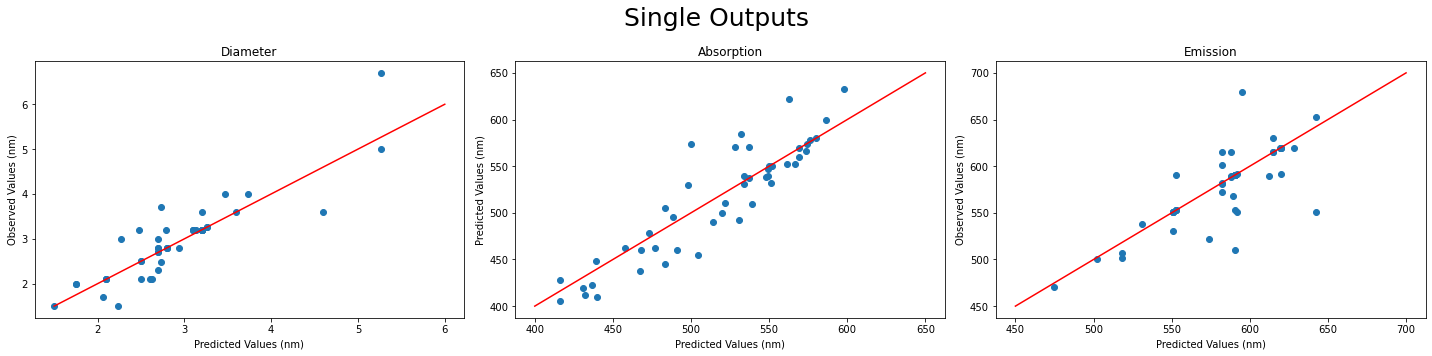

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(ET_Y_pred_d, Y_test_d, 'o')
ax1.plot([1.5,6],[1.5,6], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Predicted Values (nm)', ylabel='Observed Values (nm)')

ax2.plot(ET_Y_pred_a, Y_test_a, 'o')
ax2.plot([400,650],[400,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Predicted Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(ET_Y_pred_e, Y_test_e, 'o')
ax3.plot([450,700],[450,700], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Predicted Values (nm)', ylabel='Observed Values (nm)')


fig.tight_layout()

## Feature importance

### For diameter prediction

In [26]:
importance_dict_d = dict()
for i in range(0,57):
    importance_dict_d[input_col[i]] = ET_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance_d


[('time_min', 0.3004032115619246),
 ('x0_indium trifluoroacetate', 0.1088996097894126),
 ('x5_zinc iodide', 0.09232041278991349),
 ('temp_c', 0.077402609229714),
 ('x1_tris(trimethylsilyl)phosphine', 0.05272595298169292),
 ('first_sol_amount_ml', 0.04533173007280029),
 ('x1_tris(dimethylamino)phosphine', 0.0335163337508862),
 ('ligand_amount_mmol', 0.022430151569358237),
 ('x3_trioctylamine', 0.022277722086771992),
 ('second_sol_amount_ml', 0.021410004253790565),
 ('other_1_amount_mmol', 0.019842507213082342),
 ('x4_oleylamine', 0.016392167414590552),
 ('x2_palmitic acid', 0.015650576138054557),
 ('p_amount_mmol', 0.014955597632855944),
 ('in_amount_mmol', 0.01333939850288899),
 ('x2_lauric acid', 0.012128689290283592),
 ('x6_None', 0.01187580597848379),
 ('x3_octadecene', 0.010604152361463259),
 ('x0_indium iodide', 0.010344379660591875),
 ('x4_None', 0.010093174263392627),
 ('x6_water', 0.010065039331508653),
 ('x5_None', 0.00885234195680479),
 ('x5_zinc undecylenate', 0.008544418775

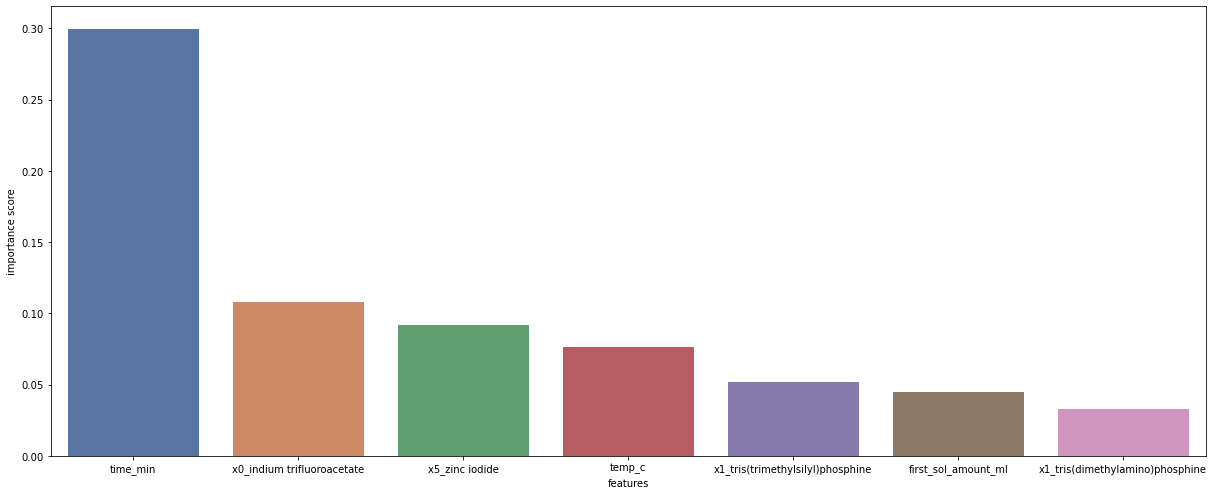

In [27]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [28]:
importance_dict_e = dict()
for i in range(0,57):
    importance_dict_e[input_col[i]] = ET_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('x5_zinc oleate', 0.21861012107550482),
 ('temp_c', 0.12922253641191175),
 ('second_sol_amount_ml', 0.09521427749351455),
 ('time_min', 0.09231295564352329),
 ('x2_myristic acid', 0.0664588967208481),
 ('x5_zinc iodide', 0.03633999806866403),
 ('other_1_amount_mmol', 0.03244293896087904),
 ('total_volume_ml', 0.031980809448997616),
 ('x4_hexadecylamine', 0.03140657594834379),
 ('x0_indium acetate', 0.03063064292601793),
 ('x5_zinc chloride', 0.02992453306566896),
 ('x5_zinc bromide', 0.029245133260180602),
 ('x6_None', 0.02862324478271055),
 ('x0_indium iodide', 0.022643106341913403),
 ('x3_trioctylamine', 0.020437135326101412),
 ('ligand_amount_mmol', 0.016270543847336737),
 ('x4_trioctylphosphine', 0.01599275122974939),
 ('x2_None', 0.01414680692966249),
 ('x1_tris(dimethylamino)phosphine', 0.010177610172923887),
 ('first_sol_amount_ml', 0.008660901185402905),
 ('p_amount_mmol', 0.008388837109091987),
 ('x5_zinc undecylenate', 0.006916035945590396),
 ('x4_None', 0.00565094267623366

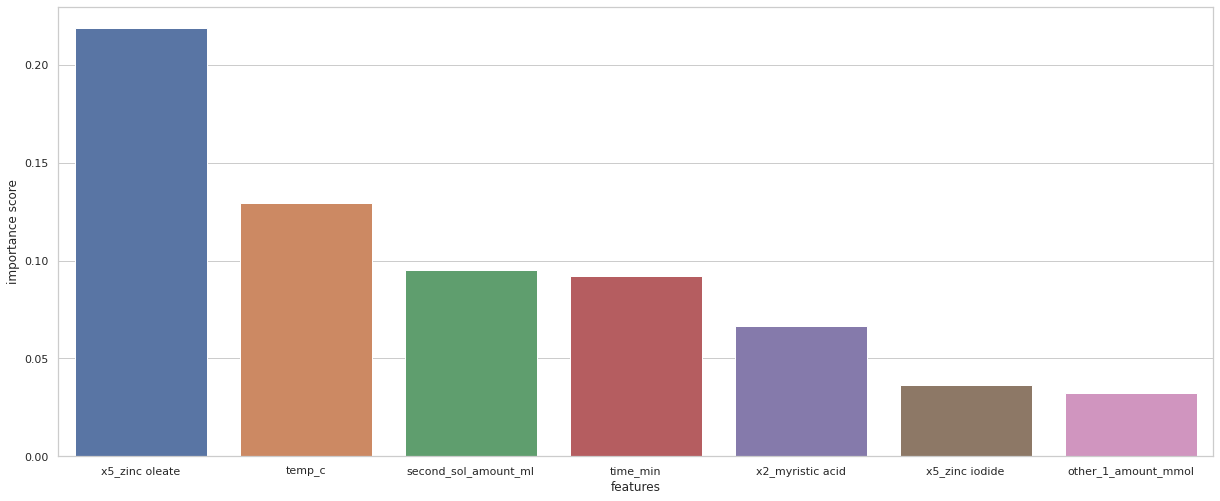

In [29]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [30]:
importance_dict_a = dict()
for i in range(0,57):
    importance_dict_a[input_col[i]] = ET_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance_a

[('time_min', 0.16634194173479624),
 ('temp_c', 0.12841123473136168),
 ('x5_zinc oleate', 0.10421251891244962),
 ('in_amount_mmol', 0.05666506496348171),
 ('x4_octylamine', 0.05113928326236564),
 ('x5_zinc iodide', 0.04683499165427508),
 ('x5_zinc bromide', 0.045759206543276316),
 ('x5_acetic acid', 0.03742347293493217),
 ('first_sol_amount_ml', 0.033416047575671445),
 ('other_1_amount_mmol', 0.030544610981050647),
 ('x6_copper bromide', 0.02761080867928227),
 ('p_amount_mmol', 0.025916218638896683),
 ('x4_None', 0.02121384961786234),
 ('other_2_amount_mmol', 0.017585906137087732),
 ('total_volume_ml', 0.017531906045169562),
 ('x4_oleylamine', 0.017343150256232554),
 ('x3_oleylamine', 0.016872924003365628),
 ('x2_palmitic acid', 0.014214134560520175),
 ('x2_stearic acid', 0.012028808619321056),
 ('x6_None', 0.011264515124095641),
 ('ligand_amount_mmol', 0.011251512507457208),
 ('x1_tris(diethylamino)phosphine', 0.010704865844823832),
 ('second_sol_amount_ml', 0.009659022569494597),
 ('

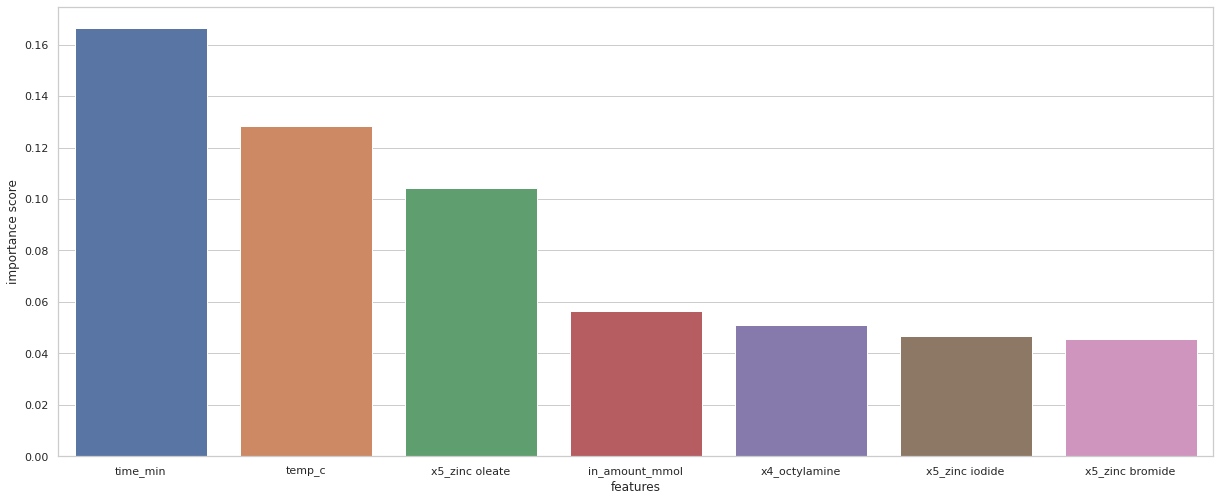

In [31]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

In [32]:
importance_dict_a

{'in_amount_mmol': 0.05666506496348171,
 'p_amount_mmol': 0.025916218638896683,
 'ligand_amount_mmol': 0.011251512507457208,
 'first_sol_amount_ml': 0.033416047575671445,
 'second_sol_amount_ml': 0.009659022569494597,
 'other_1_amount_mmol': 0.030544610981050647,
 'other_2_amount_mmol': 0.017585906137087732,
 'total_volume_ml': 0.017531906045169562,
 'temp_c': 0.12841123473136168,
 'time_min': 0.16634194173479624,
 'x0_indium acetate': 0.003708950840042799,
 'x0_indium bromide': 0.0001639939019920863,
 'x0_indium chloride': 0.005540390389558012,
 'x0_indium iodide': 0.009550190886449495,
 'x0_indium myristate': 0.0,
 'x0_indium trifluoroacetate': 0.005935431935793394,
 'x1_bis(trimethylsilyl)phosphine': 0.0,
 'x1_phosphorus trichloride': 0.0008953915749885116,
 'x1_tris(diethylamino)phosphine': 0.010704865844823832,
 'x1_tris(dimethylamino)phosphine': 1.8602318039927525e-06,
 'x1_tris(trimethylgermyl)phosphine': 0.004788340009688546,
 'x1_tris(trimethylsilyl)phosphine': 0.0015359432038

### Combine


In [33]:
sorted_a = sorted(importance_dict_a.items(), key=lambda x: x[0], reverse=False)
sorted_d = sorted(importance_dict_d.items(), key=lambda x: x[0], reverse=False)
sorted_e = sorted(importance_dict_e.items(), key=lambda x: x[0], reverse=False)


In [34]:
sorted_d 

[('first_sol_amount_ml', 0.04533173007280029),
 ('in_amount_mmol', 0.01333939850288899),
 ('ligand_amount_mmol', 0.022430151569358237),
 ('other_1_amount_mmol', 0.019842507213082342),
 ('other_2_amount_mmol', 0.007086011257369334),
 ('p_amount_mmol', 0.014955597632855944),
 ('second_sol_amount_ml', 0.021410004253790565),
 ('temp_c', 0.077402609229714),
 ('time_min', 0.3004032115619246),
 ('total_volume_ml', 0.004238489777933234),
 ('x0_indium acetate', 0.0006280619355764201),
 ('x0_indium bromide', 0.00010210003624618238),
 ('x0_indium chloride', 0.0024457632274541194),
 ('x0_indium iodide', 0.010344379660591875),
 ('x0_indium myristate', 0.002488193314206418),
 ('x0_indium trifluoroacetate', 0.1088996097894126),
 ('x1_bis(trimethylsilyl)phosphine', 0.0),
 ('x1_phosphorus trichloride', 0.002828690388984942),
 ('x1_tris(diethylamino)phosphine', 0.001852580670190939),
 ('x1_tris(dimethylamino)phosphine', 0.0335163337508862),
 ('x1_tris(trimethylgermyl)phosphine', 0.0017429028287669016),


In [35]:
combined_importance = dict()

In [36]:
for i in range(0,57):
    combined_importance[sorted_e[i][0]] = sorted_e[i][1] + sorted_a[i][1] + sorted_d[i][1]
combined_importance


{'first_sol_amount_ml': 0.08740867883387464,
 'in_amount_mmol': 0.07150399855312392,
 'ligand_amount_mmol': 0.049952207924152184,
 'other_1_amount_mmol': 0.08283005715501203,
 'other_2_amount_mmol': 0.024671917394457066,
 'p_amount_mmol': 0.049260653380844614,
 'second_sol_amount_ml': 0.1262833043167997,
 'temp_c': 0.33503638037298744,
 'time_min': 0.5590581089402442,
 'total_volume_ml': 0.053751205272100415,
 'x0_indium acetate': 0.03496765570163715,
 'x0_indium bromide': 0.00026609393823910605,
 'x0_indium chloride': 0.007986153617012132,
 'x0_indium iodide': 0.042537676888954774,
 'x0_indium myristate': 0.002488193314206418,
 'x0_indium trifluoroacetate': 0.11483504172520599,
 'x1_bis(trimethylsilyl)phosphine': 0.0,
 'x1_phosphorus trichloride': 0.0037240819639734538,
 'x1_tris(diethylamino)phosphine': 0.01255744651501477,
 'x1_tris(dimethylamino)phosphine': 0.04369580415561408,
 'x1_tris(trimethylgermyl)phosphine': 0.009555884663853874,
 'x1_tris(trimethylsilyl)phosphine': 0.054261

In [37]:
sorted_combined_importance = sorted(combined_importance.items(), key=lambda x: x[1], reverse=True)

sorted_combined_importance 

[('time_min', 0.5590581089402442),
 ('temp_c', 0.33503638037298744),
 ('x5_zinc oleate', 0.3281593560238894),
 ('x5_zinc iodide', 0.1754954025128526),
 ('second_sol_amount_ml', 0.1262833043167997),
 ('x0_indium trifluoroacetate', 0.11483504172520599),
 ('first_sol_amount_ml', 0.08740867883387464),
 ('other_1_amount_mmol', 0.08283005715501203),
 ('x5_zinc bromide', 0.07500433980345692),
 ('x2_myristic acid', 0.0748067221616483),
 ('in_amount_mmol', 0.07150399855312392),
 ('x1_tris(trimethylsilyl)phosphine', 0.05426189618551926),
 ('total_volume_ml', 0.053751205272100415),
 ('x3_trioctylamine', 0.052004531358293436),
 ('x6_None', 0.051763565885289985),
 ('x4_octylamine', 0.05113928326236564),
 ('ligand_amount_mmol', 0.049952207924152184),
 ('p_amount_mmol', 0.049260653380844614),
 ('x1_tris(dimethylamino)phosphine', 0.04369580415561408),
 ('x0_indium iodide', 0.042537676888954774),
 ('x4_hexadecylamine', 0.04160499419069608),
 ('x5_zinc chloride', 0.040927817767874956),
 ('x5_acetic acid

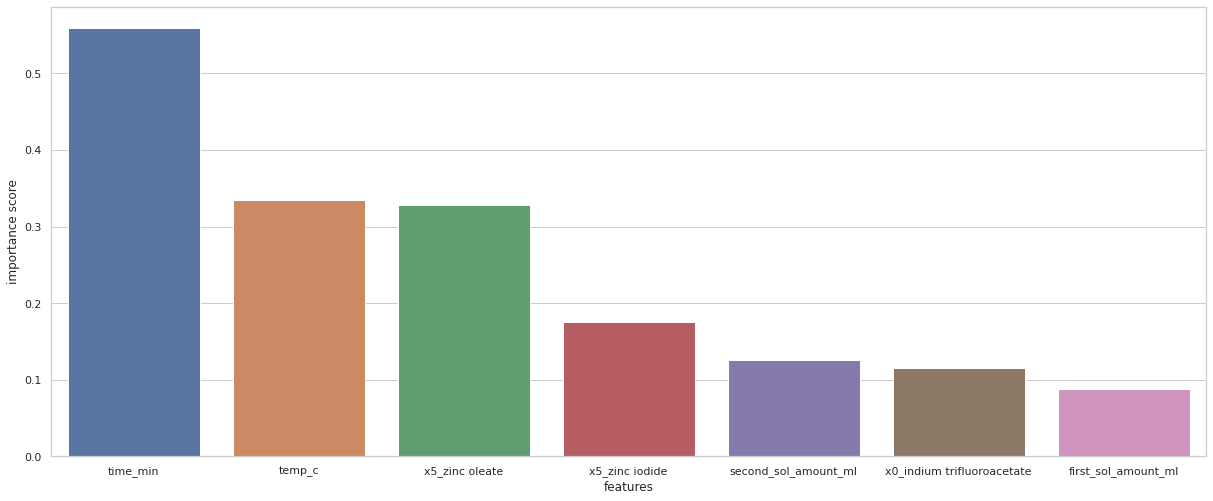

In [38]:
top7_combined = DataFrame(sorted_combined_importance[0:7], columns=['features', 'importance score'])

others_combined = DataFrame(sorted_combined_importance [7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_combined)